In [1]:
import csv
import cv2

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.models import load_model
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D


Using TensorFlow backend.


In [7]:
## Load the files list
def loadFiles(path,correction=0.2):
    lines = []
    with open(path + '/driving_log.csv') as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            lines.append(line)
    lines = lines[1:]
    print("lines=" + str(len(lines) ))

    corrections = [0,correction,-correction]
    ## load the images
    images = []
    measurements = []
    for line in lines:
        for i in range(3):
            source_path = line[i]
            filename = source_path.split('/')[-1]
            current_path = path + '/IMG/' + filename
            image = cv2.imread(current_path)
            images.append(image)
            measurement = float(line[3]) + corrections[i]
            measurements.append(measurement)
            # now, flip the image and the measurement.
            images.append(cv2.flip(image,1))
            measurements.append(-1.0*measurement)
    return (np.array(images),np.array(measurements))

#(X_train,y_train) = loadFiles('data_my_train0')
(X_train1,y_train1) = loadFiles('data_my_train2')

[-0.03733048, 0.03733048, 0.06266952, -0.06266952, -0.13733048, 0.13733048]


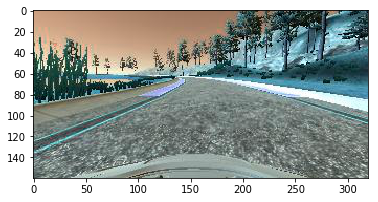

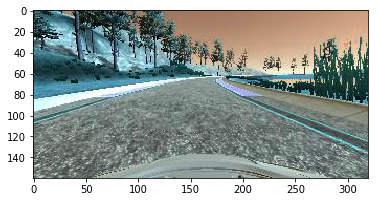

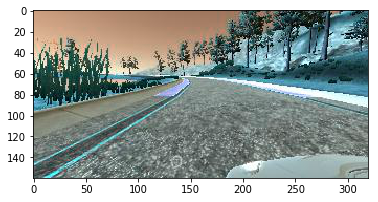

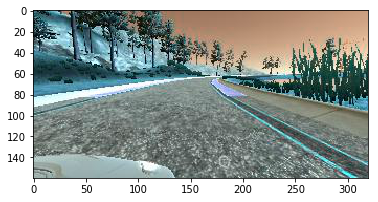

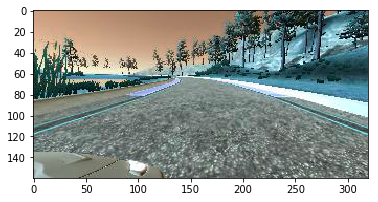

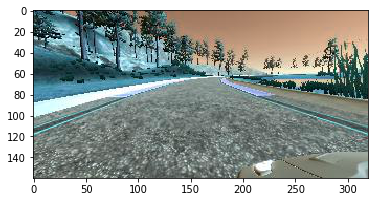

In [3]:
# sanity check
print(measurements[300:306])

imgplot = plt.imshow(images[300])
plt.figure()
imgplot = plt.imshow(images[301])
plt.figure()
imgplot = plt.imshow(images[302])
plt.figure()
imgplot = plt.imshow(images[303])
plt.figure()
imgplot = plt.imshow(images[304])
plt.figure()
imgplot = plt.imshow(images[305])



In [4]:
# The simple regression network

model = Sequential()
model.add(Cropping2D(cropping=((70,25),(0,0)), input_shape=(160,320,3) ))
model.add(Lambda(lambda x:x/255.0-0.5))
model.add(Convolution2D(24, 5, 5,activation="relu"))
model.add(Convolution2D(36, 5, 5,activation="relu"))
model.add(Convolution2D(48, 5, 5,activation="relu"))
model.add(MaxPooling2D())
model.add(Convolution2D(15, 5, 5,activation="relu"))
model.add(MaxPooling2D())
model.add(Convolution2D(8, 4, 4,activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(150))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

# Since it is a regression network and not a classification network we use mse as our error function
model.compile(loss='mse', optimizer='adam')

In [ ]:
no_epochs = 5
for e in range(no_epochs):
    model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=1)
    model.save('model_train0_' + str(e) + '.h5')


Train on 24278 samples, validate on 6070 samples
Epoch 1/1
 3168/24278 [==>...........................] - ETA: 418s - loss: 0.0194

In [8]:
# We want to load a model and add some training to the problematic sections
# load model
model = load_model('model_train0_2.h5')
no_epochs = 5
for e in range(no_epochs):
    model.fit(X_train1, y_train1, validation_split=0.2, shuffle=True, nb_epoch=1)
    model.save('model_train0_2_then_2_' + str(e) + '.h5')


Train on 20452 samples, validate on 5114 samples
Epoch 1/1
20452/20452 [==============================] - 380s - loss: 0.0323 - val_loss: 0.0558
Train on 20452 samples, validate on 5114 samples
Epoch 1/1
20452/20452 [==============================] - 379s - loss: 0.0277 - val_loss: 0.0537
Train on 20452 samples, validate on 5114 samples
Epoch 1/1
20452/20452 [==============================] - 379s - loss: 0.0259 - val_loss: 0.0489
Train on 20452 samples, validate on 5114 samples
Epoch 1/1
20452/20452 [==============================] - 379s - loss: 0.0240 - val_loss: 0.0593
Train on 20452 samples, validate on 5114 samples
Epoch 1/1
20452/20452 [==============================] - 379s - loss: 0.0226 - val_loss: 0.0504
